In [1]:
from google_research_trimap.trimap import trimap
import trimap_og
import umap
import json

import jax.random as random
from sklearn.datasets import fetch_openml, make_s_curve
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [2]:
key = random.PRNGKey(42)

In [3]:
# # Load the MNIST dataset
# mnist = fetch_openml('mnist_784', version=1)
# X, y = mnist['data'], mnist['target']

In [4]:
filename = "mammoth_3d.json"
filename_targets = "mammoth_umap.json"
# read json
with open(filename, 'r') as f:
    mammoth = json.load(f)
print(mammoth[:2])
with open(filename_targets, 'r') as f:
    mammoth_filename_targets = json.load(f)
# mammoth_filename_targets = mammoth_filename_targets['labels']

[[430.82599999999996, 106.86399999999999, 24.491999999999997], [397.73400000000004, 99.29299999999999, 14.37]]


In [5]:
# %matplotlib inline
# # 3d graph of the mammooth with its targets
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(
#     [x[0] for x in mammoth_filename_targets['3d']],
#     [x[1] for x in mammoth_filename_targets['3d']],
#     [x[2] for x in mammoth_filename_targets['3d']],
#     c=mammoth_filename_targets['labels'],
#     s=1,
#     alpha=0.5,
# )
# plt.title("3D Mammoth Graph")
# # view 
# ax.view_init(elev=45, azim=-45)
# plt.show()

In [6]:
s_curve = make_s_curve(500, noise=0)

In [7]:
print(len(mammoth))

10000


In [8]:
X = np.array(mammoth_filename_targets['3d'])
y = np.array(mammoth_filename_targets['labels'])
# X = np.array(s_curve[0])
# y = np.array(s_curve[1])

In [36]:
# swiss-roll
from sklearn.datasets import make_swiss_roll
roll = make_swiss_roll(n_samples=1000, noise=0)
X = roll[0]
y = roll[1]

In [37]:
# %%time
# embedding_trimap = trimap.transform(key, X, auto_diff=False, output_metric='squared_euclidean', lr=10)

In [38]:
%%time
embedding_trimap_ad = trimap.transform(key, X, auto_diff=True, output_metric='squared_euclidean', lr=100, init_embedding='pca')

CPU times: user 17.1 s, sys: 692 ms, total: 17.8 s
Wall time: 16.4 s


In [39]:
# PCA of mammoth into 2D space
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [40]:
# %%time
# embedding_trimap_og = trimap_og.transform(key, X)

In [41]:
%%time
# embedding_umap = np.load("embedding_umap.npy")
embedding_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
np.save("embedding_umap.npy", embedding_umap)

/opt/anaconda3/envs/mulan/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/mulan/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


CPU times: user 6.16 s, sys: 125 ms, total: 6.28 s
Wall time: 6.26 s


In [42]:
%%time
# # embedding_tsne = np.load("embedding_tsne.npy")
embedding_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
np.save("embedding_tsne.npy", embedding_tsne)

CPU times: user 10.3 s, sys: 173 ms, total: 10.4 s
Wall time: 1.8 s


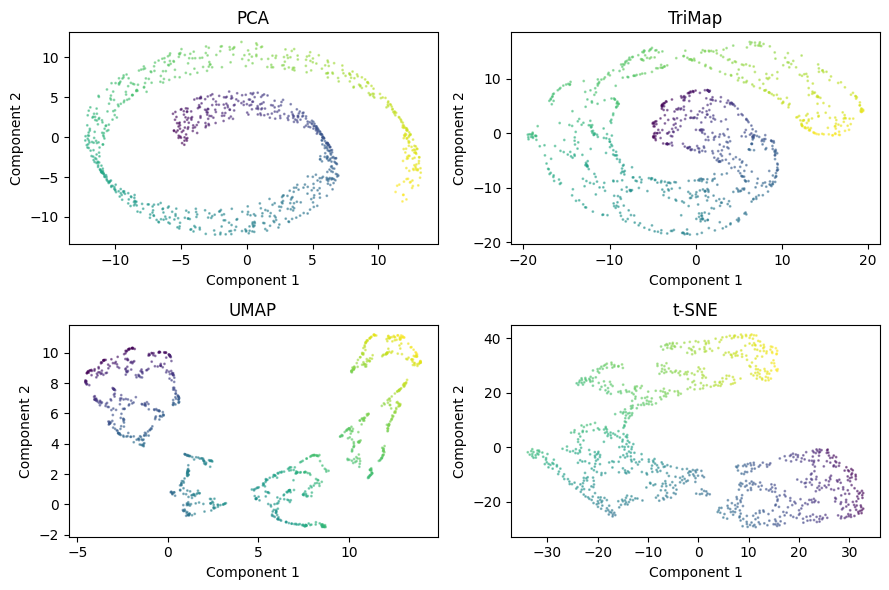

In [43]:
# Assuming trimap, trimap_ad, umap, tsne, and pca are already computed
fig, axes = plt.subplots(2, 2, figsize=(9, 6))

# Plot PCA
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], s=1, alpha=0.5, c=y, cmap='viridis')
axes[0, 0].set_title("PCA")
axes[0, 0].set_xlabel("Component 1")
axes[0, 0].set_ylabel("Component 2")

# Plot TriMap
axes[0, 1].scatter(embedding_trimap_ad[:, 0], embedding_trimap_ad[:, 1], s=1, alpha=0.5, c=y, cmap='viridis')
axes[0, 1].set_title("TriMap")
axes[0, 1].set_xlabel("Component 1")
axes[0, 1].set_ylabel("Component 2")

# Plot UMAP
axes[1, 0].scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=1, alpha=0.5, c=y, cmap='viridis')
axes[1, 0].set_title("UMAP")
axes[1, 0].set_xlabel("Component 1")
axes[1, 0].set_ylabel("Component 2")

# Plot t-SNE
axes[1, 1].scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=1, alpha=0.5, c=y, cmap='viridis')
axes[1, 1].set_title("t-SNE")
axes[1, 1].set_xlabel("Component 1")
axes[1, 1].set_ylabel("Component 2")

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
# lr=10
# init_embedding='pca'

In [16]:
# %%time
# # trimap autodiff save plot every 10 frames
# embeddings_trimap = trimap.transform(key, X, auto_diff=True, output_metric='squared_euclidean', export_iters=True, init_embedding=init_embedding, lr=lr, n_iters=400)

In [17]:
#save every 10th embedding as a plot
# make directory mammoth_trimap_autodiff_squared_euclidean
# dir_name = f"mammoth_trimap_autodiff_squared_euclidean_lr{lr}_{init_embedding}" 
# import os
# if not os.path.exists(dir_name):
#     os.makedirs(dir_name)
# for i, embedding in enumerate(embeddings_trimap):
#     if i % 10 == 0:
#         plt.figure(figsize=(3, 3))
#         plt.scatter(
#             embedding[:, 0],
#             embedding[:, 1],
#             c=y,
#             s=1,
#             alpha=0.5,
#         )
#         plt.savefig(f"{dir_name}/iteration_{i}.png")
#         plt.close()

In [18]:
# animate the frames from dir_name into a gif
# import imageio
# def create_gif_from_images(image_folder, output_gif):
#     images = []
#     for filename in sorted(os.listdir(image_folder)):
#         if not filename.endswith(".png"):
#             continue
#         # global path
#         filename = os.path.join(image_folder, filename)
#         images.append(imageio.imread(filename))
#     imageio.mimsave(output_gif, images, duration=0.1)
# # Create the GIF
# print(dir_name)
# create_gif_from_images(dir_name, f"{dir_name}/animation.gif")